<li>Name: Mio Tomita</li>
<li>Submission Date: June 28, 2022</li>

# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but in non-COVID times we also have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [1]:
import pandas as pd
from datetime import datetime, date

In [2]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

## 1. Read in the file using pandas, and look at the first five rows

* *Tip: You will probably need to pip install something to make this Excel file work!*

In [3]:
#!pip install xlrd

In [4]:
url = 'http://atmenv.envi.osakafu-u.ac.jp/omu-content/uploads/sites/1215/2015/10/KyotoFullFlower7.xls'

In [5]:
df = pd.read_excel(url)

In [6]:
df.head(5)

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add **a parameter to make sure your columns look right**. How can you tell pandas to skip rows?

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [7]:
#skip rows
df = pd.read_excel(url, skiprows=25)

## 3. Look at the final five rows of the data

In [8]:
df.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 4. Add some NaN values

It looks like you should have NaN/missing values in the beginning of the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

* *Tip: it's another open with reading in the file!*

In [9]:
df = pd.read_excel(url, skiprows=25, na_values='-', dtype={'Full-flowering date':str})

In [10]:
df.columns = df.columns.str.lower().str.replace('[(|)|-]','', regex=True).str.replace(' ','_')

## 5. What reference is the most commonly used when figuring out cherry blossom flowering dates?

If the first result is `"-"`, you need to redo the last question.

In [11]:
df.reference_name.value_counts().head(5)

NEWS-PAPER(ARASHIYAMA)        94
SUGIURAKE-NIKKI               38
MYOHOIN-HINAMIKI              32
OYUDONONO-UENO-NIKKI          26
OYUDONONO-UENO-NIKKI [EDA]    21
Name: reference_name, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

In [12]:
df = df[df.fullflowering_date_doy.notnull()]

## 6.5 Confirm you now have 827 rows

In [13]:
df[df.fullflowering_date_doy.notnull()].shape

(827, 6)

## 7. Make a histogram of the full-flowering date

In [14]:
df['date_dt'] = pd.to_datetime(df.fullflowering_date,format='%m%d')

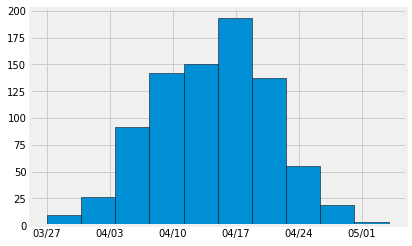

In [15]:
ax = df.date_dt.hist(ec='k')

#date format
date_form = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.show()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

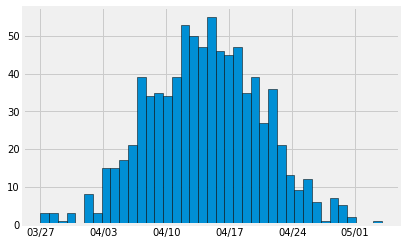

In [16]:
ax = df.date_dt.dropna().sort_values().hist(bins=39, ec='k')

#date format
date_form = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.show()

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [17]:
#average is 105 days
#we have 827 records
df.fullflowering_date_doy.describe()

count    827.000000
mean     104.540508
std        6.407036
min       86.000000
25%      100.000000
50%      105.000000
75%      109.000000
max      124.000000
Name: fullflowering_date_doy, dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [18]:
df[df.ad<1900].fullflowering_date_doy.median()

105.0

## 11. How about after 1900?

In [19]:
df[df.ad>1900].fullflowering_date_doy.median()

99.0

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [20]:
#TYPE : Data type, which shows priority for phenological data presition
       #0 : data from modern times (full-bloom date since 1880s)
       #1 : from diary description about full-bloom
       #2 : from diary description about cherry blossom viewing party
       #3 : from diary description about presents of cherry twigs from party participants
       #4 : title in Japanese poety
       #8 : estimated by full-flowering dates of wisteria
       #9 : estimated by full-flowering dates of Japanese kerria

In [21]:
(df.data_type_code==4).sum()

39

## 13. Display the rows where our data was from a title in Japanese poetry

In [22]:
pd.options.display.max_rows = None

In [23]:
df.query("data_type_code==4")

,ad,fullflowering_date_doy,fullflowering_date,source_code,data_type_code,reference_name,date_dt
90,891,109.0,419,5.0,4.0,NIHONKIRYAKU,1900-04-19
94,895,104.0,414,5.0,4.0,NIHONKIRYAKU,1900-04-14
95,896,104.0,413,5.0,4.0,NIPPON-SANDAI-JITSUROKU,1900-04-13
122,923,104.0,414,5.0,4.0,ZOKU-KOKIN-WAKASHU,1900-04-14
154,955,89.0,330,5.0,4.0,SHUISHO,1900-03-30
168,969,98.0,408,5.0,4.0,NIHONKIRYAKU,1900-04-08
206,1007,106.0,416,5.0,4.0,MIDO-KAMPAKUKI,1900-04-16
232,1033,102.0,412,5.0,4.0,NIHONKIRYAKU,1900-04-12
235,1036,104.0,413,5.0,4.0,NIHONKIRYAKU,1900-04-13
259,1060,108.0,417,5.0,4.0,SHIN-SENZAI-WAKASHU,1900-04-17


## 14. Graph the full-flowering date (DOY) over time

<AxesSubplot:title={'center':'Full-Flowering Date(DOY)'}, xlabel='ad'>

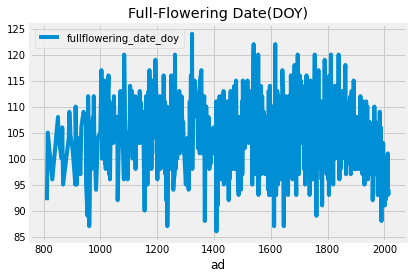

In [24]:
df.plot(x='ad', y="fullflowering_date_doy", title="Full-Flowering Date(DOY)")

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [25]:
df.rolling(10, on='ad', min_periods=5).fullflowering_date_doy.mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: fullflowering_date_doy, dtype: float64

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

In [26]:
df['rolling_date'] = df.rolling(20, on='ad', min_periods=5
                               ).fullflowering_date_doy.mean()

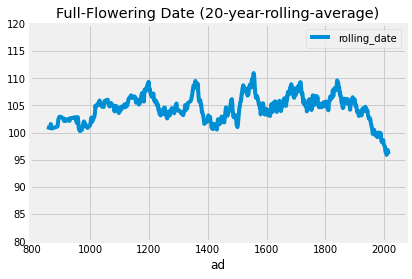

In [27]:
df.plot(
    x='ad', 
    y='rolling_date', 
    ylim=(80,120), 
    title='Full-Flowering Date (20-year-rolling-average)'
)
plt.show()

## 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

There are **at least two ways to do this.**

#### WAY ONE: The bad-yet-simple way

If you don't want to use `pd.to_datetime`, you can use this as an sample for updating March. It finds everything with a date less than 400 and assigns `March` to the `month` column:

```python
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'
```

#### WAY TWO: The good-yet-complicated way

* When you use `pd.to_datetime`, if pandas doesn't figure it out automatically you can also pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df.colname, "format='%Y-%m-%d")`.
* `errors='coerce'` will return `NaN` for missing values. By default it just yells "I don't know what to do!!!"
* And remember how we used `df.date_column.dt.month` to get the number of the month? For the name, you use `dt.strftime` (string-formatted-time), and pass it [the same codes](https://strftime.org/) to tell it what to do. For example, `df.date_column.dt.strftime("%Y-%m-%d")` would give you `"2020-04-09"`.

In [28]:
df['month'] =pd.to_datetime(df.fullflowering_date, format="%m%d", errors="coerce").dt.strftime('%B')

## 17. Using your new column, how many blossomings happened in each month?

In [29]:
#sort order
months = ['March', 'April', 'May']

In [30]:
df.month.value_counts()[months]

March     10
April    814
May        3
Name: month, dtype: int64

## 18. Make a bar graph of how many blossomings happened in each month.

<AxesSubplot:>

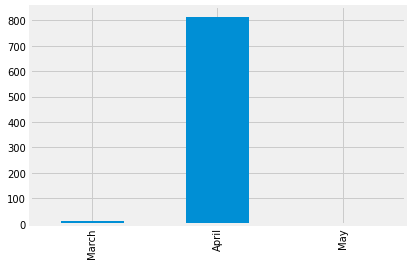

In [31]:
df.month.value_counts()[months].plot(kind='bar')

## 19. Adding a day-of-month column

Now we're going to add a new column called `day_of_month.`

*Tip: If you didn't drop the rows missing full-flowering dates earlier, it will yell at you about missing data. Go back up and fix Number 6!*

In [32]:
df['day_of_month'] = pd.to_datetime(df.fullflowering_date, format="%m%d", errors="coerce").dt.strftime('%d').astype(int)

## 20. Adding a date column

If you don't have a nice-looking date column yet, take the `'month'` and `'day_of_month'` columns and combine them in order to create a new column called `'date'`. By "nice looking," I mean it should say something like `April 11`.

* Instead of using the two existing columns, you could learn to use `.dt.strftime` as mentioned above.

In [33]:
df['date'] = pd.to_datetime(df.fullflowering_date, format="%m%d", errors="coerce").dt.strftime('%B %d')

In [34]:
df.date.sample(10)

1181    April 03
477     April 23
1039    April 14
840     April 27
621     April 19
1115    April 21
930     April 14
491     April 16
841     April 24
749     April 21
Name: date, dtype: object

## 21. What day of the week do cherry blossoms like to blossom on?

Do they get the weekends off?

In [35]:
#month number
df['month_number'] = df.month.apply(lambda x: datetime.strptime(x, '%B').month)

In [36]:
df[['ad','month_number','day_of_month']].head()

,ad,month_number,day_of_month
11,812,4,1
14,815,4,15
30,831,4,6
50,851,4,18
52,853,4,14


In [37]:
#not working
#because years are too old...?
#df['day_of_week'] = pd.to_datetime(df[['ad','month_number','day_of_month']]).dt.strftime('%A')

In [38]:
#So I used datetime.date() instead.....
#Rodrigo(TA) says this looks ok
#but I'm curious what other ways we can do it more pythonic?

df['day_of_week'] = df[['ad','month_number','day_of_month']
                      ].apply(lambda x: date(x[0], x[1], x[2]
                                            ).strftime('%A'), axis=1)

In [39]:
#Yes! We get to see cherry blossoms on weekends!
df.day_of_week.value_counts()

Sunday       144
Thursday     132
Friday       121
Tuesday      114
Wednesday    106
Monday       105
Saturday     105
Name: day_of_week, dtype: int64

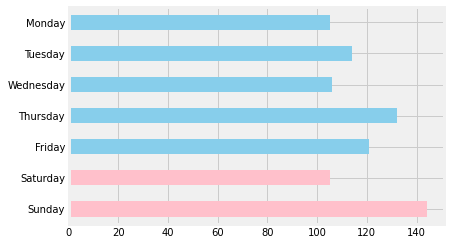

In [40]:
#graph
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
colors = ['skyblue'] * 5 + ['pink'] *2

df.day_of_week.value_counts()[days].plot(kind='barh',color=colors).invert_yaxis()

# YOU ARE DONE.

And **incredible.**